## Bengaluru House Price Prediction

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.metrics import r2_score

from sklearn.feature_extraction import DictVectorizer

import pickle

import warnings
warnings.filterwarnings('ignore')

### 01 - Data Ingestion

In [2]:
# Reading data from csv file and making dataframe
df = pd.read_csv('bengaluru_house_data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


**Observation:** All column names are in required case[snake case]. So no need to rename column names.

### 2. Exploratory Data Analysis

#### Basic Information

In [3]:
# Checking the shape
df.shape

(13320, 9)

In [4]:
# Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


**Observation:** `total_sqft` should be numerical

In [5]:
# List of columns
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
# List of numerical columns
numerical = ['bath', 'balcony']

# List of categorical columns
categorical = ['area_type', 'availability', 'location', 'size', 'society','total_sqft']

In [7]:
# Basic description
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


#### Feature Importance

In [8]:
# Checking null values
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [9]:
# Dropping null values to analyse the feature importance
df_full = df.dropna()
df_full.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [10]:
# Function to calculate the mutual info score
def mutual_info_price_score(series):
    return mutual_info_score(series, df_full.price)

In [11]:
# Categorical columns
df_full[categorical].apply(mutual_info_price_score).sort_values(ascending=False)

society         4.399999
total_sqft      3.930880
location        2.683790
availability    0.784313
size            0.621616
area_type       0.176325
dtype: float64

In [12]:
# Numerical columns
df_full[numerical].corrwith(df_full.price)

bath       0.594844
balcony    0.170138
dtype: float64

**Observation:** From feature importance activity and by general understaning `area_type`, `society`,`balcony`, and `availability` feature looing less important.

In [13]:
# Dropping less important feature
df_main = df.drop(columns = ['area_type','society','balcony','availability'])
df_main.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [14]:
# Basic information
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


#### Missing Value Handling

In [15]:
# Checking shape
df_main.shape

(13320, 5)

In [16]:
# Checking missing values
df_main.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

**Observation:** Very few values are missing. We can drop them.

In [17]:
# Dropping the missing value
df_main = df_main.dropna()

In [18]:
# Checking missing values
df_main.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

#### Individual Feature Analysis

##### Feature: `size`

In [19]:
df1 = df_main.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
dtypes: float64(2), object(3)
memory usage: 620.9+ KB


In [20]:
# Unique values
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [21]:
# Unique value counts
df1['size'].value_counts()

size
2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [22]:
# Making a new feature by counting number of bedrooms and BHK
df1['bhk'] = df1['size'].apply(lambda x : int(x.split(' ')[0]))
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


##### Feature: `total_sqft`

In [23]:
# Making copy of previous dataframe
df2 = df1.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   bhk         13246 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 724.4+ KB


**Observation:** Here `total_sqft` is `categorical`. This should be `numerical`.

In [24]:
# Function to check categorical value pattern
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [25]:
# Observing categorical pattern
df2[~df2['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


**Observation:** Values are hyphens seperated.

In [26]:
# This function will take average of both values
def convert(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [27]:
# Testing
convert('333 - 333')

333.0

In [28]:
# Converting the values
df2['total_sqft']  =  df2['total_sqft'].apply(convert)
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [29]:
# Checking null values
df2.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [30]:
# Very few null values just dropping
df2 = df2.dropna()

In [31]:
# Dropping those values which have less than 300 sqft space per bedroom
df2 = df2[~(df2.total_sqft/df2.bhk < 300)]
df2.shape

(12456, 6)

In [32]:
# Creating one more feature price_per_sqft
df2["price_per_sqft"] = df2["price"]*100000/df2["total_sqft"]
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [33]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df2 = remove_pps_outliers(df2)
df2.shape

(9259, 7)

##### Feature: `location`

In [34]:
# Making a copy
df3 = df2.copy()
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Devarabeesana Halli,3 BHK,1672.0,3.0,150.0,3,8971.291866
1,Devarabeesana Halli,3 BHK,1750.0,3.0,149.0,3,8514.285714
2,Devarabeesana Halli,3 BHK,1750.0,3.0,150.0,3,8571.428571
3,Devarachikkanahalli,3 BHK,1250.0,2.0,44.0,3,3520.000000
4,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,3200.000000


In [35]:
# Unique values count
df3.location = df3.location.apply(lambda x: x.strip())
location_stats = df3['location'].value_counts(ascending=False)
location_stats

location
Whitefield           478
Sarjapur  Road       296
Electronic City      278
Kanakpura Road       190
Yelahanka            169
                    ... 
Manjunatha Layout      1
Mangammanapalya        1
Shirdi Sai Layout      1
Hallehalli             1
Kashi Nagar            1
Name: count, Length: 761, dtype: int64

In [36]:
# Count of unique location
len(location_stats)

761

In [37]:
# Count of location which have less than 10 properties
len(location_stats[location_stats<=10])

581

In [38]:
# Creating list of location which have less than 10 properties
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Doddakallasandra     10
Prithvi Layout       10
Yelenahalli          10
Sarakki Nagar        10
Rajiv Nagar          10
                     ..
Manjunatha Layout     1
Mangammanapalya       1
Shirdi Sai Layout     1
Hallehalli            1
Kashi Nagar           1
Name: count, Length: 581, dtype: int64

In [39]:
# Making location value other is there is less than 10 properties
df3.location = df3.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [40]:
# Count of unique values
len(df3.location.unique())

181

##### Feature: `bath`

In [41]:
# Making copy
df4 = df3.copy()
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9259 entries, 0 to 9258
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        9259 non-null   object 
 1   size            9259 non-null   object 
 2   total_sqft      9259 non-null   float64
 3   bath            9259 non-null   float64
 4   price           9259 non-null   float64
 5   bhk             9259 non-null   int64  
 6   price_per_sqft  9259 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 506.5+ KB


In [42]:
# Converting data type to int
df4['bath'] = df4['bath'].astype('int')
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9259 entries, 0 to 9258
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        9259 non-null   object 
 1   size            9259 non-null   object 
 2   total_sqft      9259 non-null   float64
 3   bath            9259 non-null   int32  
 4   price           9259 non-null   float64
 5   bhk             9259 non-null   int64  
 6   price_per_sqft  9259 non-null   float64
dtypes: float64(3), int32(1), int64(1), object(2)
memory usage: 470.3+ KB


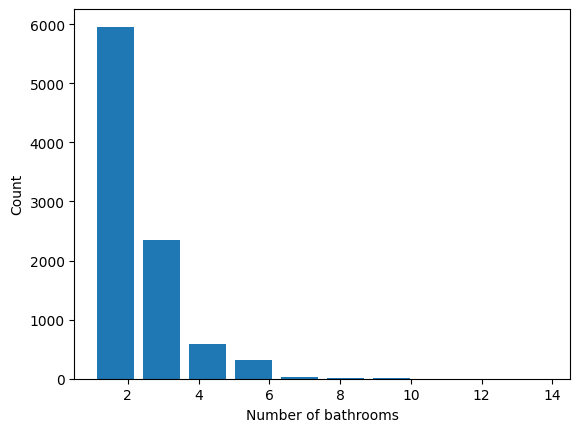

In [43]:
# Histogram for number of bathrooms
plt.hist(df4.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")
plt.show()

In [44]:
# Checking which have more than 10 bathrooms
df4[df4.bath > 10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
779,other,9 Bedroom,3300.0,14,500.0,9,15151.515152
6181,Neeladri Nagar,10 BHK,4000.0,12,160.0,10,4000.000000


**Observation:** It is unusual to have 2 more bathrooms than number of bedrooms in a home. So we are discarding that also.

In [45]:
df4 = df4[df4.bath < df4.bhk+2]
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,other,3 BHK,1672.0,3,150.0,3,8971.291866
1,other,3 BHK,1750.0,3,149.0,3,8514.285714
2,other,3 BHK,1750.0,3,150.0,3,8571.428571
3,Devarachikkanahalli,3 BHK,1250.0,2,44.0,3,3520.000000
4,Devarachikkanahalli,2 BHK,1250.0,2,40.0,2,3200.000000


### 3. Model Training

In [46]:
# Making a copy
df_full = df4.copy()
df_full.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,other,3 BHK,1672.0,3,150.0,3,8971.291866
1,other,3 BHK,1750.0,3,149.0,3,8514.285714
2,other,3 BHK,1750.0,3,150.0,3,8571.428571
3,Devarachikkanahalli,3 BHK,1250.0,2,44.0,3,3520.000000
4,Devarachikkanahalli,2 BHK,1250.0,2,40.0,2,3200.000000


In [47]:
# Dropping the size columns since we have bhk
df_full = df_full.drop(columns=['size', 'price_per_sqft'])
df_full.head()

,location,total_sqft,bath,price,bhk
0,other,1672.0,3,150.0,3
1,other,1750.0,3,149.0,3
2,other,1750.0,3,150.0,3
3,Devarachikkanahalli,1250.0,2,44.0,3
4,Devarachikkanahalli,1250.0,2,40.0,2


In [48]:
# Splitting dataset
df_train, df_test = train_test_split(df_full, test_size=0.2, random_state=1)

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.price.values
y_test = df_test.price.values

del df_train['price']
del df_test['price']

#### Linear Regression

In [49]:
dicts_train = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dicts_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [50]:
from sklearn.linear_model import LinearRegression

# Create a Linear regression model instance
linear_reg = LinearRegression()

# Fit the model to the training data
linear_reg.fit(X_train, y_train)

# Score the model on the test data
linear_score = linear_reg.score(X_test, y_test)

print(f'Linear Regression Score: {linear_score}')

Linear Regression Score: 0.5911246393196921


#### Lasso Regression

In [51]:
from sklearn.linear_model import Lasso

# Create a Lasso regression model instance
lasso_reg = Lasso(alpha=1.0)

# Fit the model to the training data
lasso_reg.fit(X_train, y_train)

# Score the model on the test data
lasso_score = lasso_reg.score(X_test, y_test)

print(f'Lasso Regression Score: {lasso_score}')

Lasso Regression Score: 0.5289011117852493


#### Ridge Regression

In [52]:
from sklearn.linear_model import Ridge

# Create a Ridge regression model instance
ridge_reg = Ridge(alpha=1.0)

# Fit the model to the training data
ridge_reg.fit(X_train, y_train)

# Score the model on the test data
ridge_score = ridge_reg.score(X_test, y_test)

print(f'Ridge Regression Score: {ridge_score}')

Ridge Regression Score: 0.5922586013514921


#### Decision Tree Regressor

In [53]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree regressor model instance
tree_reg = DecisionTreeRegressor()

# Fit the model to the training data
tree_reg.fit(X_train, y_train)

# Score the model on the test data
tree_score = tree_reg.score(X_test, y_test)

print(f'Decision Tree Regressor Score: {tree_score}')

Decision Tree Regressor Score: 0.4787090164749821


#### Random Forest Regressor

In [54]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest regressor model instance
forest_reg = RandomForestRegressor(n_estimators=100)

# Fit the model to the training data
forest_reg.fit(X_train, y_train)

# Score the model on the test data
forest_score = forest_reg.score(X_test, y_test)

print(f'Random Forest Regressor Score: {forest_score}')

Random Forest Regressor Score: 0.6144949719403425


#### Gradient Boosting Regressor

In [55]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting regressor model instance
gbr_reg = GradientBoostingRegressor(n_estimators=100)

# Fit the model to the training data
gbr_reg.fit(X_train, y_train)

# Score the model on the test data
gbr_score = gbr_reg.score(X_test, y_test)

print(f'Gradient Boosting Regressor Score: {gbr_score}')

Gradient Boosting Regressor Score: 0.620764460114869


### 4. Training Final Model

#### Numerical and categorical features

In [56]:
df_full.columns

Index(['location', 'total_sqft', 'bath', 'price', 'bhk'], dtype='object')

In [57]:
numerical = ['total_sqft', 'bath', 'bhk']
categorical = ['location']

#### Model training

In [58]:
# Function to train the model
def train(df_train, y_train):
    dicts = df_train[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = GradientBoostingRegressor(n_estimators=100)
    model.fit(X_train, y_train)

    return dv, model

In [59]:
# Function to predict
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X_test = dv.transform(dicts)
    y_pred = model.predict(X_test)

    return y_pred

In [60]:
# Model Training
dv, model = train(df_train, y_train)
y_pred = predict(df_test, dv, model)

In [61]:
# Model Accuracy
score = r2_score(y_test, y_pred)
print(f'Gradient Boosting Regressor Score (R-squared): {score}')

Gradient Boosting Regressor Score (R-squared): 0.620764460114869


### 5. Save, Load and Test Model

#### Save Model

In [62]:
# Constructing the model file name
output_file_name = f'gbr_model.bin'
output_file_name

'gbr_model.bin'

In [63]:
# Opening file and saving the model
with open(output_file_name , 'wb') as f_out:
    pickle.dump((dv, model), f_out)

#### Load Model

In [64]:
model_name = 'gbr_model.bin'

In [65]:
# Opening file and loading the model
with open(model_name, 'rb') as f_in:
    dv, model = pickle.load(f_in)

In [66]:
dv, model

(DictVectorizer(sparse=False), GradientBoostingRegressor())

#### Testing Loaded Model

In [67]:
# Selecting one random house
house = df4[categorical+numerical].iloc[100].to_dict()
house

{'location': 'other', 'total_sqft': 4500.0, 'bath': 9, 'bhk': 9}

In [68]:
house_X = dv.transform([house])
house_X

array([[9.0e+00, 9.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
      

In [69]:
model.predict(house_X)[0]

330.13516800536905